In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.compiler import transpile
provider = IBMQ.load_account()
import numpy as np
from qiskit.tools.monitor import job_monitor

### ZADANIE1.1
Do zaobserwowanie dekoherencji użyję układu realizującego funkcję SWAP zbudowanego z 3 bramek CNOT i porównam z układem który dokłada dodatkowo 3 bramki identycznościowe przed pomiarem 

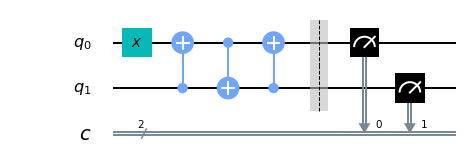

In [2]:
circ1 = QuantumCircuit(2,2)
circ1.x(0)
circ1.cx(1,0)
circ1.cx(0,1)
circ1.cx(1,0)
circ1.barrier(range(2))
circ1.measure(range(2),range(2))
circ1.draw()

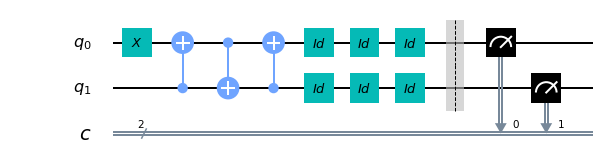

In [3]:
circ2 = QuantumCircuit(2,2)
circ2.x(0)
circ2.cx(1,0)
circ2.cx(0,1)
circ2.cx(1,0)
circ2.iden(1)
circ2.iden(0)
circ2.iden(1)
circ2.iden(0)
circ2.iden(1)
circ2.iden(0)
circ2.barrier(range(2))
circ2.measure(range(2),range(2))
circ2.draw()

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


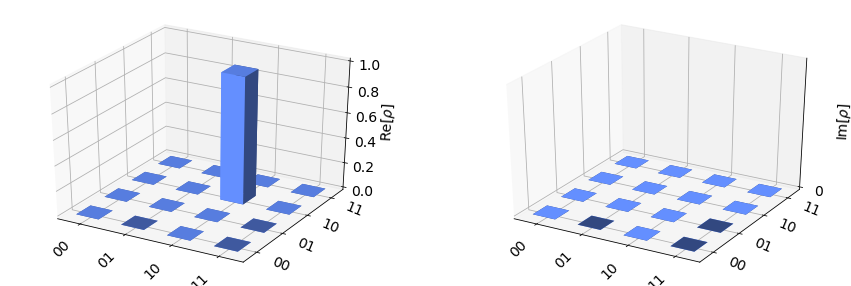

In [4]:
backend = Aer.get_backend('statevector_simulator')
outputstate1 = execute(circ1, backend).result().get_statevector(circ1, decimals=3)
print(outputstate1)
plot_state_city(outputstate1)

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


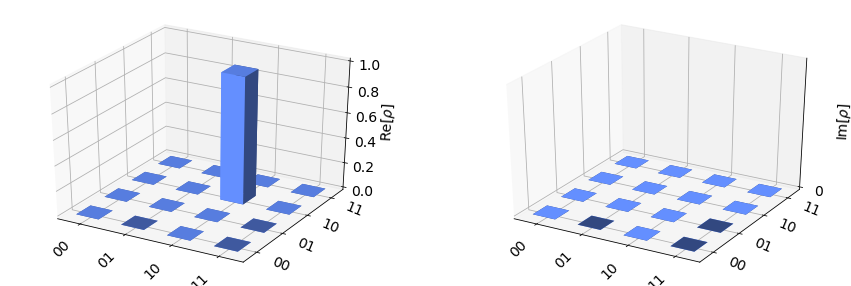

In [5]:
outputstate2 = execute(circ2, backend).result().get_statevector(circ2, decimals=3)
print(outputstate2)
plot_state_city(outputstate2)

Zgodnie z wyliczeniami symulacja statevector wskazała, że układy są równoważne i produkują stan |10> z prawdopodobieństwem 1.

In [6]:
backend = provider.get_backend('ibmq_16_melbourne')
job_exp1 = execute(circ1, backend=backend)
job_monitor(job_exp1)
job_exp2 = execute(circ2, backend=backend)
job_monitor(job_exp2)

Job Status: job has successfully run
Job Status: job has successfully run


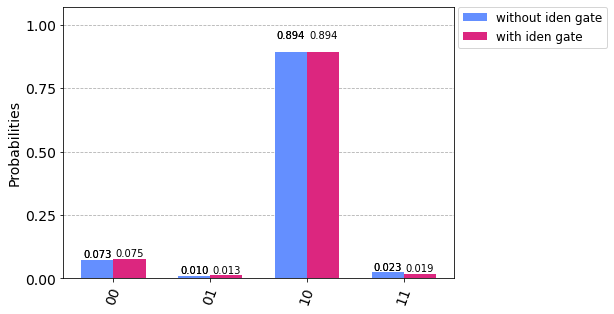

In [7]:
counts_exp1 = job_exp1.result().get_counts(circ1)
counts_exp2 = job_exp2.result().get_counts(circ2)
plot_histogram([counts_exp1, counts_exp2], legend=['without iden gate', 'with iden gate'])

Uruchamiając obydwa układy na komputerze melbourne widać wpływ dekoherencji. Tylko 90% wyników zgadza się z wyliczonymi, wyniki uzyskane przez obydwa układy nie są równe. Dodatkowo wykonując obwód za każdym razem otrzymany rozkład wyników jest trochę inny. Wpływ na odmienność rozkładów od wyliczonych amplitud mają też błędy wprowadzane przez połączenia.

### ZADANIE1.2
Odtwarzam układ złożyony z 2 qubitów z początkowym stanem `|00>` z zadania2

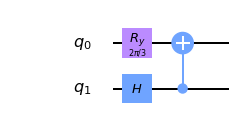

In [8]:
import numpy as np
circ = QuantumCircuit(2)

circ.ry(2*np.pi/3,0)
circ.h(1)
circ.cx(1,0)
circ.draw()

Dwie pierwsze symulacje liczą amplitudy stanu końcowego i macierze gęstości., ale zakładając, że układ jest układem idealnym i mamy do czynienia ze stanem czystym. Nie ma utraty informacji związanej z dokonaniem pomiaru, dekoherencji i błędów wprowadzonych przez połączenia pomiędy qubitami. 

[0.354+0.j 0.612+0.j 0.612+0.j 0.354+0.j]


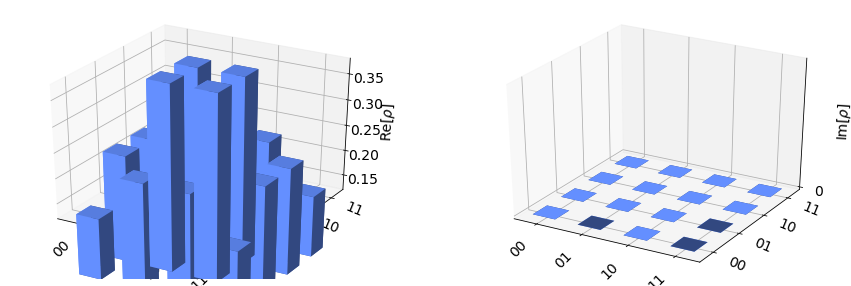

In [9]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
plot_state_city(outputstate)

In [10]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

print(result.get_unitary(circ, decimals=3))

[[ 0.354+0.j -0.612+0.j  0.354-0.j -0.612+0.j]
 [ 0.612+0.j  0.354+0.j  0.612-0.j  0.354-0.j]
 [ 0.612+0.j  0.354+0.j -0.612+0.j -0.354+0.j]
 [ 0.354+0.j -0.612+0.j -0.354+0.j  0.612-0.j]]


Uzyskane amplitudy i macierz gęstości jest więc taka jak te policzone ręcznie   

Symulacja przy użyciu 'quasm_simulator' wprowadza element pomiaru stanu końcowego, który jest niezbędnym elementem uzyskania informacji w prawdziwym komputerze kwantowym. Rozkłady są estymowane poprzez wykonanie układu wiele razy i zliczenie pomiarów. 

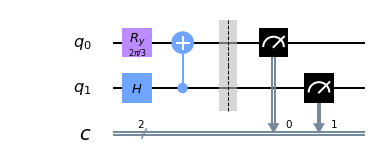

In [11]:
meas = QuantumCircuit(2, 2)
circ.barrier(range(2))
meas.measure(range(2),range(2))
qc = circ+meas
qc.draw()

{'01': 383, '00': 121, '10': 406, '11': 114}


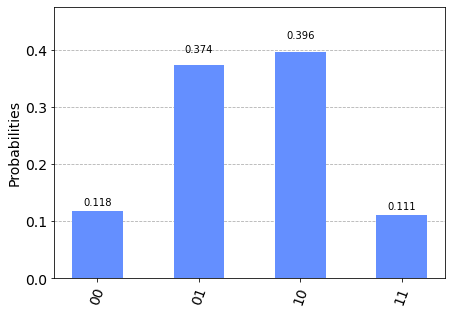

In [12]:
backend_sim = Aer.get_backend('qasm_simulator')

job_sim = execute(qc, backend_sim, shots=1024)

result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
plot_histogram(counts)

{'01': 374707, '00': 124720, '10': 375401, '11': 125172}


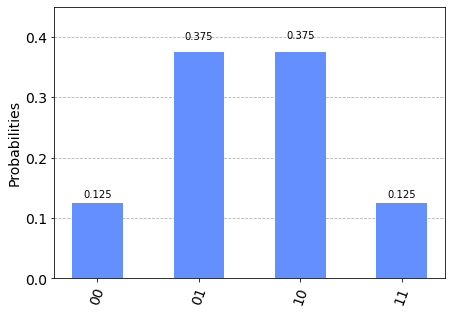

In [13]:
job_sim2 = execute(qc, backend_sim, shots=1000000)
result_sim2 = job_sim2.result()
counts2 = result_sim2.get_counts(qc)
print(counts2)
plot_histogram(counts2)

Pierwszy histogram uzyskany jest poprzez wykonaie układu 1024 razy, a drugi 1000000. Wraz ze wzrostem liczby powtórzeń uzyskane przybliżenie stanu końcowego jest bliższe wyliczonemu przez 2 pierwsze symulacje. 

In [14]:
IBMQ.providers()
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_16_melbourne')

job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [16]:
result_exp = job_exp.result()

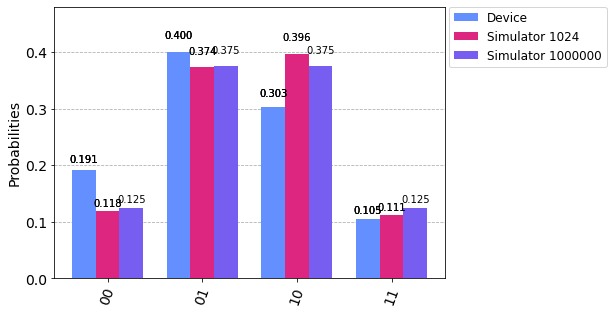

In [17]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts,counts2], legend=['Device', 'Simulator 1024', 'Simulator 1000000'])

Wykonanie układu na komputerze melbourn wprowadza (poza sposobem estymowania wyniku poprzez wielokrotne wykonanie) dekoherencję, błędy wynikające z połączeń między qubitami. Zamiast na teoretycznych stanach czystych obliczenia wykonywane są na 